# Bernstein--Vazirani Algorithm

In [1]:
from qiskit import QuantumCircuit, execute,Aer
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

import numpy as np

In [9]:
def bv_circuit(s):
    n=len(s)
    s=s[::-1]#for qiskit ordering

    bv_circuit=QuantumCircuit(n+1,n)

    #setting anicilia to |->
    bv_circuit.x(n)
    #applying h to all the qubits before oracle
    bv_circuit.h(range(n+1))

    bv_circuit.barrier()
    for i in range(n):
        if s[i]=='1':
            bv_circuit.cx(i,n)
    
    bv_circuit.barrier()
    bv_circuit.h(range(n))
    
    for i in range(n):
        bv_circuit.measure(i,i)
    
    return bv_circuit

In [24]:
def simulate(circuit,shots=1024):
    backend=Aer.get_backend('qasm_simulator')
    job=execute(circuit,backend=backend,shots=shots)
    results=job.result()
    display(plot_histogram(results.get_counts()))

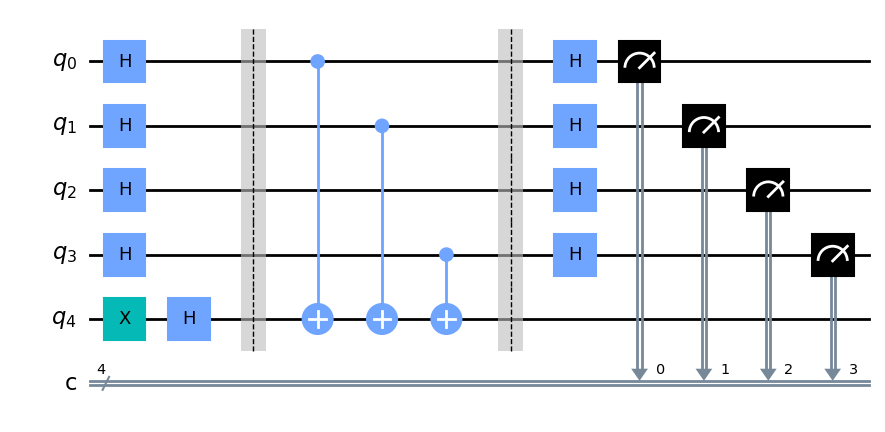

In [25]:
circuit=bv_circuit('1011')
display(circuit.draw('mpl'))

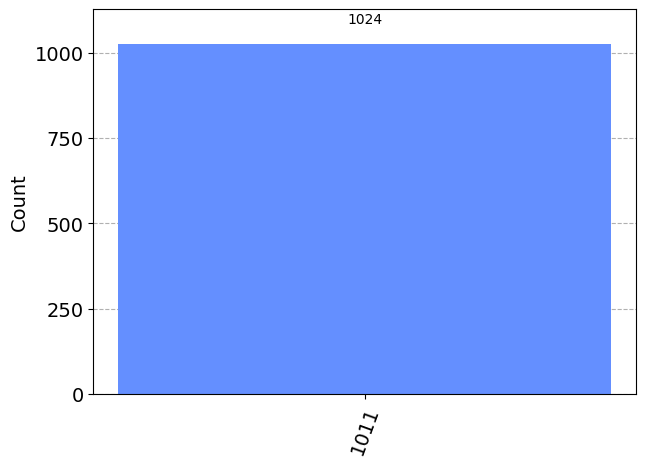

In [26]:
simulate(circuit)

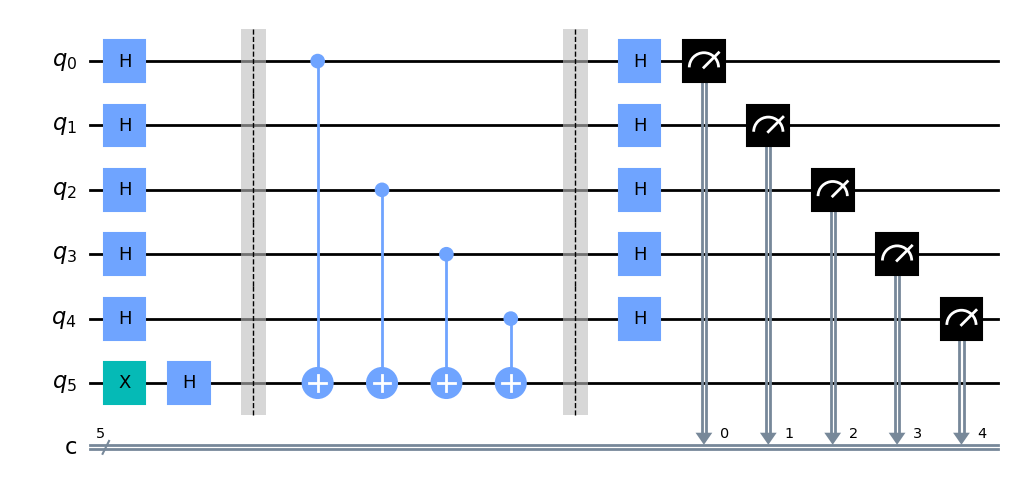

In [27]:
circuit=bv_circuit('11101')
display(circuit.draw('mpl'))

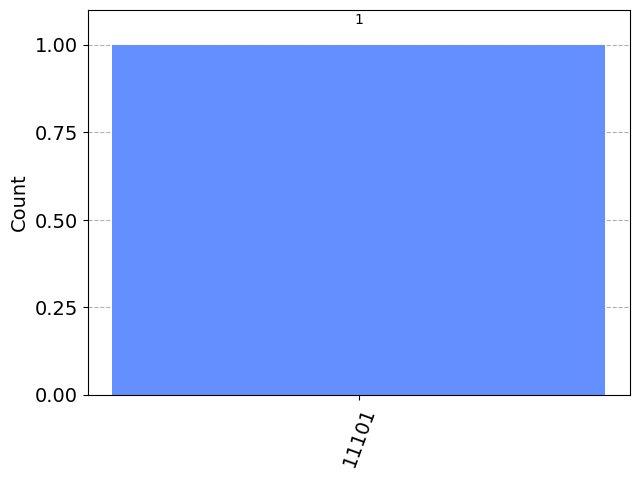

In [29]:
simulate(circuit,1)